## Unsupervised

One of the unsupervised part of this project is to perform the Region of Interest. The ROI of the chest X-ray image will be extracting or segmenting lung region. This might be useful in pre-processing part of the image to train CNN model only on the lung region as most of the COVID features would be from the lung region. Here we will explore some of the options to segment lung.

### 1. Thresholding

### a) Manual Thresholding

Although this is not an unsupervised method, the first intution was to try segmenting lung with thresholding. The chest X-ray images are in grayscale and lung regions mostly varies from 0.3 ~ 0.8. The background will be mostly black and the other body parts such as bones, liver, stomach, and arms are in white color. This means that lung could be segmented simpy by dividing pixels into its intensity.

To start with 8 images were randomly selected:
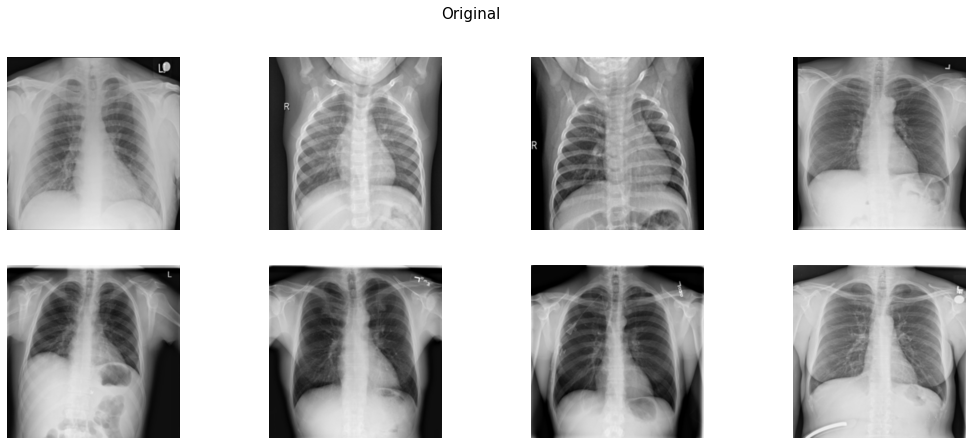

A image was normalized by the maximum pixel intensity and countor plot was used to evenly divide the intensity.
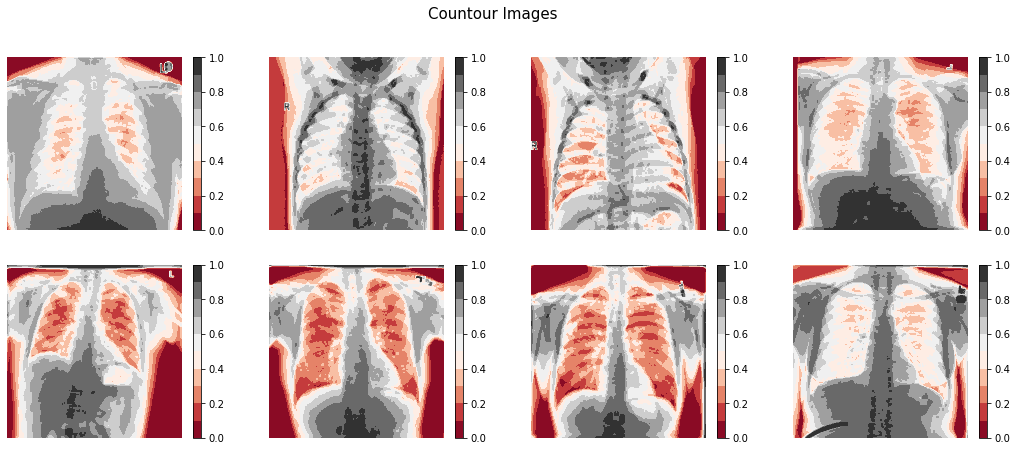

To futher improve the above contour image, an erosion was applied to the images
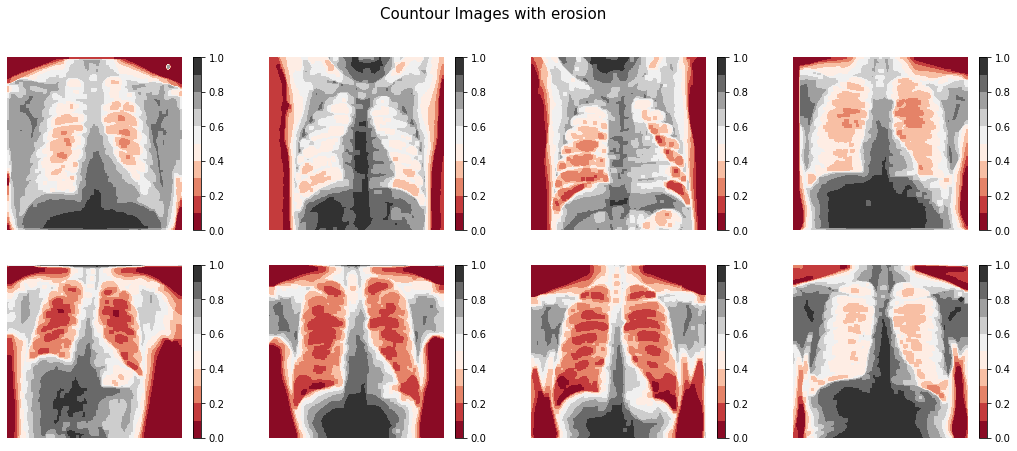

Then, the activation functions that is typically used in the Neural Network model was implemented if it could drop insignificant pixel intensity.

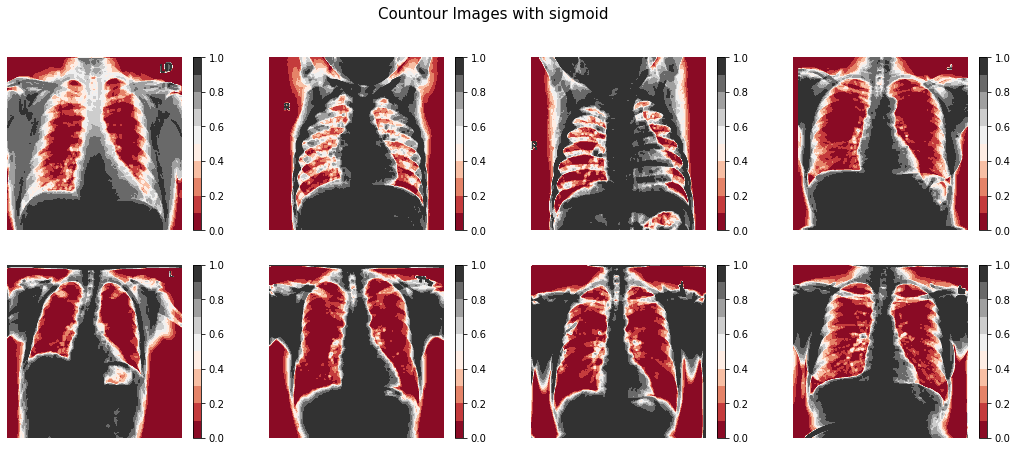

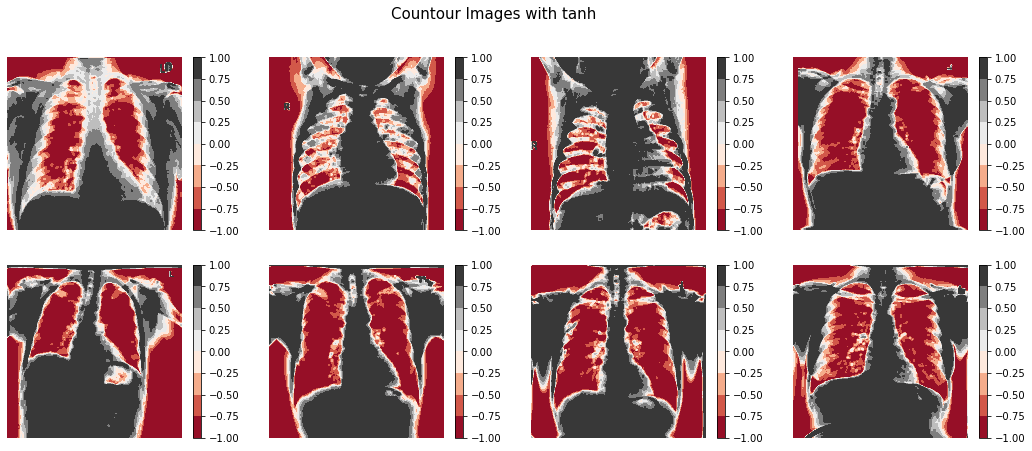

The sigmoid and tanh applied to the iamge showed better segmentation of the lung segment. However, as we can see there still need a lot of improvement or implementations to get whole part of the lung region.

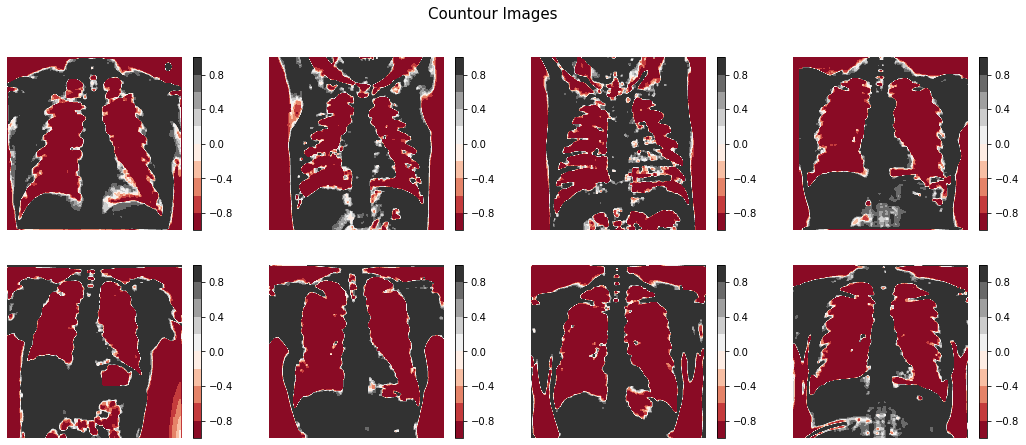

The above countour images are images with Gaussian Blur applied with tanh function. The result is so far the best for the thresholding.

Till now, we have been manually selecting the threshold values to determine which range of pixel intensity to use to determine the lung region. However, this approach is not valid as lung opacity varies throughout the images.

### b) Otsu's Method

The Otsu's method come in hand as it automatically determines the threshold value to segemnt the image. Otsu's method determines an optimal global threshold value from the image histogram. In simple case, it finds the top two peaks in the histogram and and will choose middle value in between the two peeks as threshold. This way it will minimize the weighted wihtin-class variance given by as:
$$\sigma_w^2(t) = q_1(t)\sigma_1^2(t)+q_2(t)\sigma_2^2(t)
$$

where, 

$$q_1(t) = \sum_{i=1}^{t} P(i) \quad \& \quad q_2(t) = \sum_{i=t+1}^{I} P(i)
$$

$$\mu_1(t) = \sum_{i=1}^{t} \frac{iP(i)}{q_1(t)} \quad \& \quad \mu_2(t) = \sum_{i=t+1}^{I} \frac{iP(i)}{q_2(t)}
$$

$$\sigma_1^2(t) = \sum_{i=1}^{t} [i-\mu_1(t)]^2 \frac{P(i)}{q_1(t)} \quad \& \quad \sigma_2^2(t) = \sum_{i=t+1}^{I} [i-\mu_2(t)]^2 \frac{P(i)}{q_2(t)}
$$

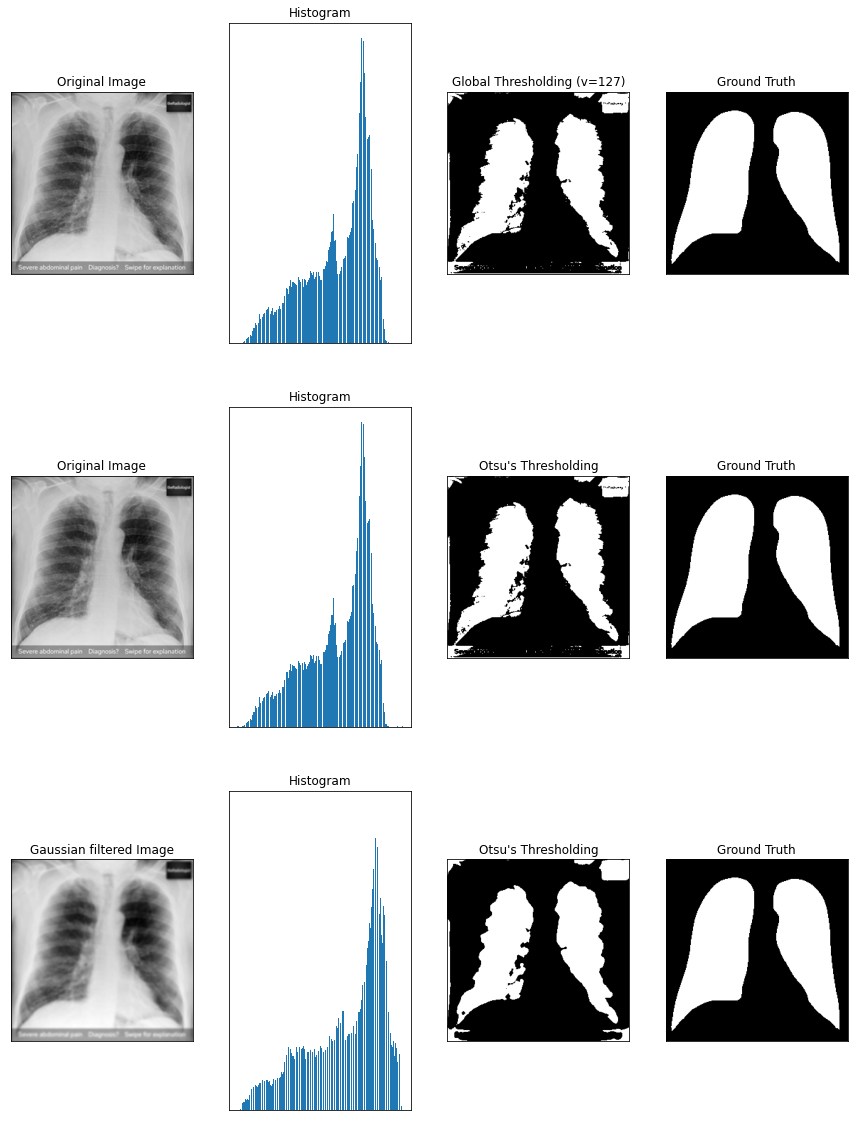

The global threshold of 127 was close to threshold resulted from the Otsu's method as the result shows. As we found earlier that the thresholding was better with the Gaussian Blur or Filter. The result also shows that the last row with the Gaussian shows much smoother segmentation.

### 2. Clustering

#### a) Simple Linear Iterative Clustering (SLIC)

The SLIC algorithm generates superxiels by clustering pixels based on their color similarity and proximity in the image plane.

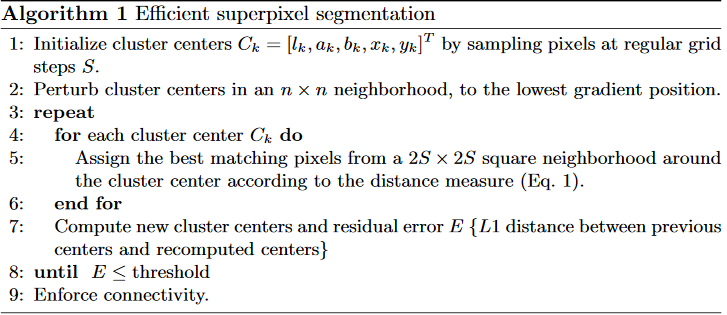
<center> Reference: http://www.kev-smith.com/papers/SLIC_Superpixels.pdf</center>

A series of SLIC algorith was passed to cluster small clusters to larger cluster. After each SLIC, the pixel value within the same cluster was replaced by the mean value within the cluster in order to improve segmentation by generalizing the pixel within same cluster.

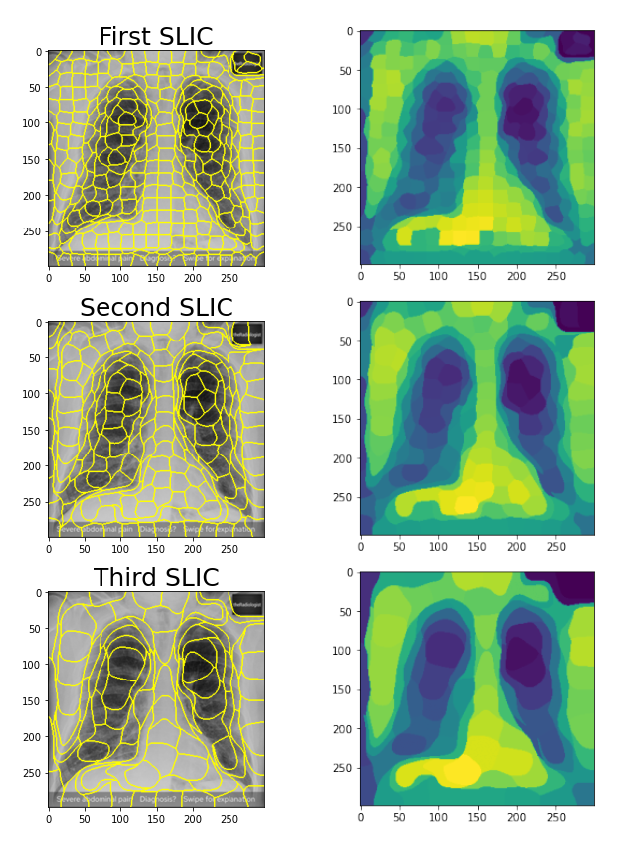

Then the Otsu's method was implemented to create mask.

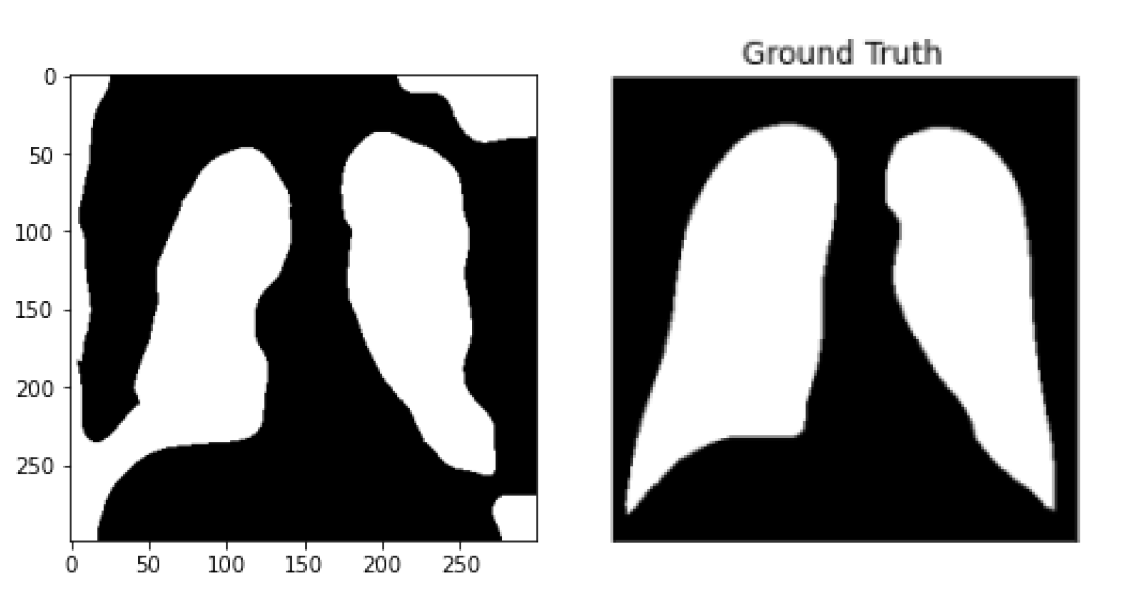

The seies of SLIC method with Otsu's method produced much better result. The lung region contains much more lung region than the Otsu's method only. However, this resulted more of the unwanted part of the X-ray images and further examination with other X-ray images did not produced good result.

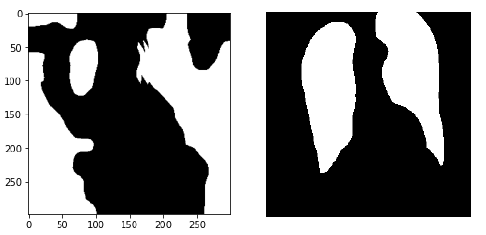

#### b) Chan-vese clustering

The Chan-Vese segmentation algorithm is designed to segment objects without clearly defined boundaries. This algorithm is based on level sets that are evolved iteratively to minimize an energy, which is defined by weighted values corresponding to the sum of differences intensity from the average value outside the segmented region, the sum of differences from the average value inside the segmented region, and a term which is dependent on the length of the boundary of the segmented region. [Source: scikit-image]

Chan-vese algorithm aims to minizie following energy function:
$$F(c_1,c_2,C) = \mu \cdot Length(C) + v \cdot Area(inside(C)) + \lambda_1 \int_{inside(C)} |u_0(x,y)-c_1|^2dxdy + \lambda_2 \int_{outside(C)} |u_0(x,y)-c_2|^2dxdy$$

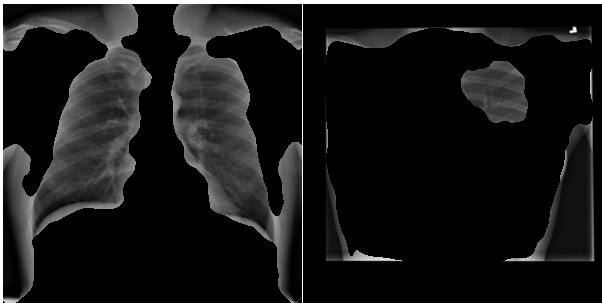

One of the issue found with Chan-vese clustering is that it needs extra information on which is foreground and background. Otherwise, the mask will applied to non-lung region. The right image above is one of the failure accounted with Chan-vese.

Overall the result shows that segmenting lung region with unsupervised method is difficult to achieve due to its various pixel intensity. This unsupervised method could result better with semi-supervised method. Such could be feeding information about the foreground or background and typical lung shape.